<a href="https://colab.research.google.com/github/Prado1bernardo/data_science/blob/master/Analisando_os_Dados_do_Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *New York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Entendendo o objetivo da análise:

Neste *notebook*, iremos analisar os dados referentes à cidade Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.


### Obtenção dos Dados


In [4]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('listings (1).csv')

### Dicionário das variáveis


* id - Código gerado para identificação do imóvel
* name - Nome anunciado do imóvel
* host_id - Código gerado para identificação do proprietário
* host_name	- Nome do proprietário
* neighbourhood_group	- Grupo bairro que o imóvel se encontra
* neighbourhood	- Bairro do imóvel
* latitude	- Coordenada da latitude do imóvel
* longitude	- Coordenada da longitude do imóvel
* room_type	- Tipo de quarto que é oferecido
* price	- Preço do imóvel
* minimum_nights	- Quantidade mínima de noites para reserva
* number_of_reviews	- Número de avaliações que o imóvel possui
* last_review	- Última avaliação
* reviews_per_month	- Quantidade de avaliações por mês
* calculated_host_listings_count	- número total de propriedades ou quartos que um anfitrião
* availability_365	- Número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm	- números de avaliações nos últimos 12 meses.
* license	- Código de identificação da licença

In [6]:
# 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Studio Oasis | Midtown Manhattan Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.24,3,289,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,96.0,30,195,2025-06-09,0.98,1,285,3,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,59.0,30,1,2022-06-05,0.02,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,73.0,30,249,2025-05-27,1.28,1,186,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.07,2,0,0,NaN


### Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

In [7]:
# identificar o volume de dados do DataFrame
print('Entradas: {}'.format(df.shape[0]))
print('Variaveis: {}'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 36111
Variaveis: 18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### Qual a porcentagem de valores ausentes no *dataset*?



In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
license,0.851126
price,0.409377
reviews_per_month,0.309822
last_review,0.309822
host_name,0.032289
name,0.000055
id,0.000000
neighbourhood,0.000000
neighbourhood_group,0.000000
host_id,0.000000


**Sobre os dados faltantes:**


*   A coluna **license** possui 85% dos registros vazios.

Vamos excluí-la


In [9]:
#Dropando colunas e verificando o novo df
df.drop('license',axis=1, inplace=True)
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
price,0.409377
reviews_per_month,0.309822
last_review,0.309822
host_name,0.032289
name,0.000055
id,0.000000
neighbourhood,0.000000
host_id,0.000000
neighbourhood_group,0.000000
room_type,0.000000


### Qual o tipo de distribuição das variáveis?


In [10]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,21328.000000,36111.000000,36111.000000,24923.000000,36111.000000,36111.000000,36111.000000
mean,680.526819,28.610091,27.321232,0.821178,67.455152,162.188724,3.983606
std,4480.453282,29.166476,70.308684,1.916104,215.678813,147.262625,19.468284
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,89.000000,30.000000,0.000000,0.070000,1.000000,0.000000,0.000000
50%,154.000000,30.000000,3.000000,0.250000,2.000000,150.000000,0.000000
75%,279.000000,30.000000,23.000000,0.900000,9.000000,315.000000,1.000000
max,50104.000000,1124.000000,3736.000000,122.760000,1148.000000,365.000000,1699.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

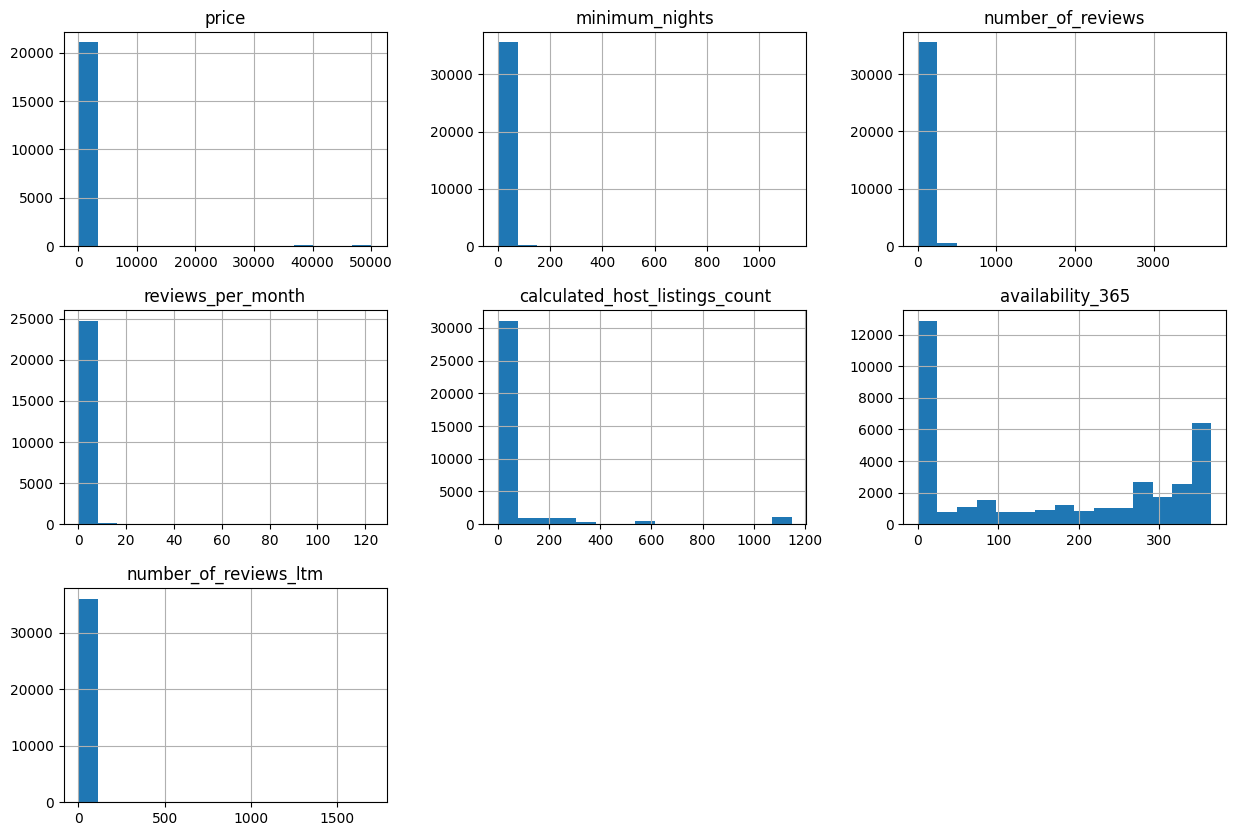

In [11]:
# plotar o histograma das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].hist(bins=15, figsize=(15,10))

Com base no histograma plotado é possível perceber alguns indícios de outliers no dataset. Normalmente a análise para verificar se existe algum valor extremo (Outlier) no dataset é a plotagem de um gráfico de caixa (boxplot).

Vamos analisar três das sete colunas acima, são elas: price, minimum_nights e number_of_reviews


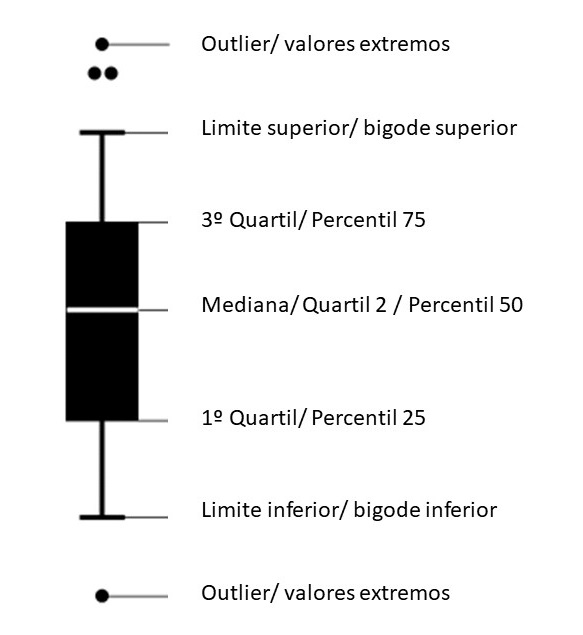

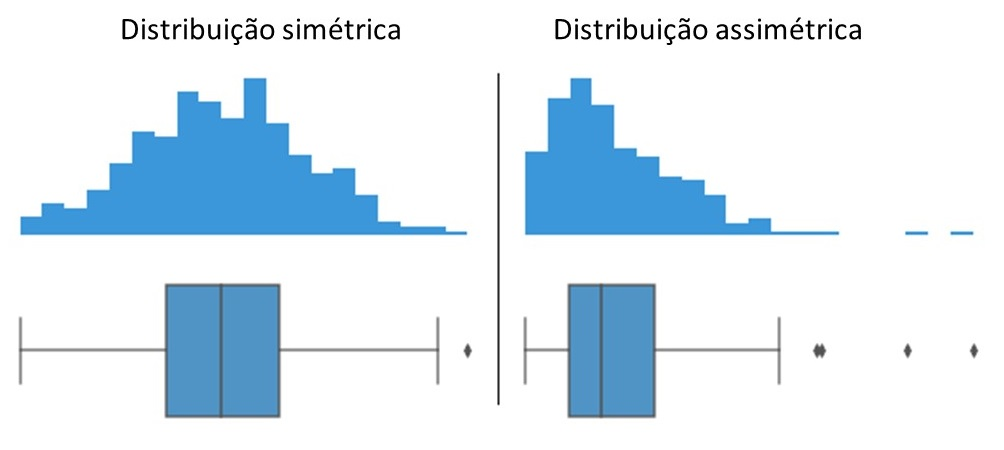

Verificando os outliers no preço dos imóveis para reserva.

price : valores acima de 800
791 entradas
2.19%


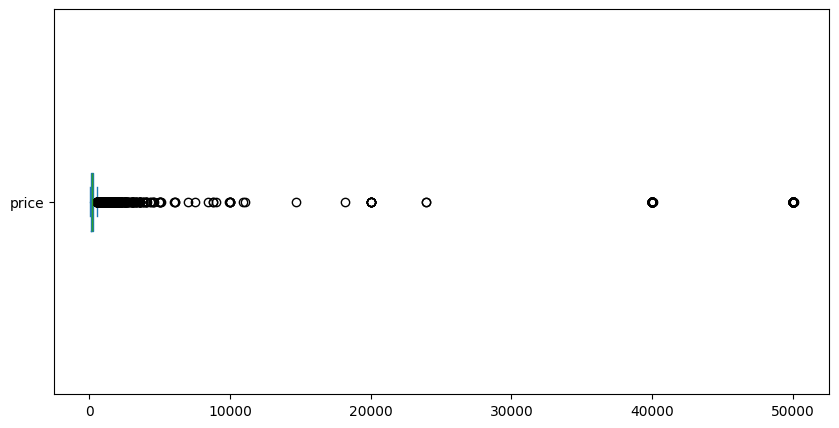

In [12]:
df.price.plot(kind='box',vert=False,figsize=(10,5))
print('price : valores acima de 800')
print('{} entradas'.format(len(df[df.price > 800])))
print('{:.2f}%'.format((len(df[df.price > 800]) / df.shape[0])*100))


Verificando os outliers para a quantidade mínima de noites por reserva.

minimum_nights : valores acima de 31
860 entradas
2.38%


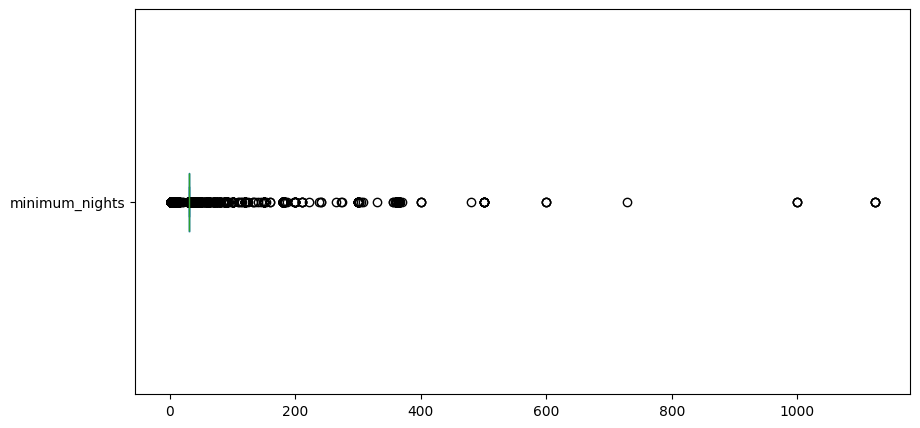

In [13]:
df.minimum_nights.plot(kind='box',vert=False,figsize=(10,5))
print('minimum_nights : valores acima de 31')
print('{} entradas'.format(len(df[df.minimum_nights > 31])))
print('{:.2f}%'.format((len(df[df.minimum_nights > 31]) / df.shape[0])*100))

Verificando os outliers para as avaliações.

number_of_reviews : valores acima de 100
2745 entradas
7.60%


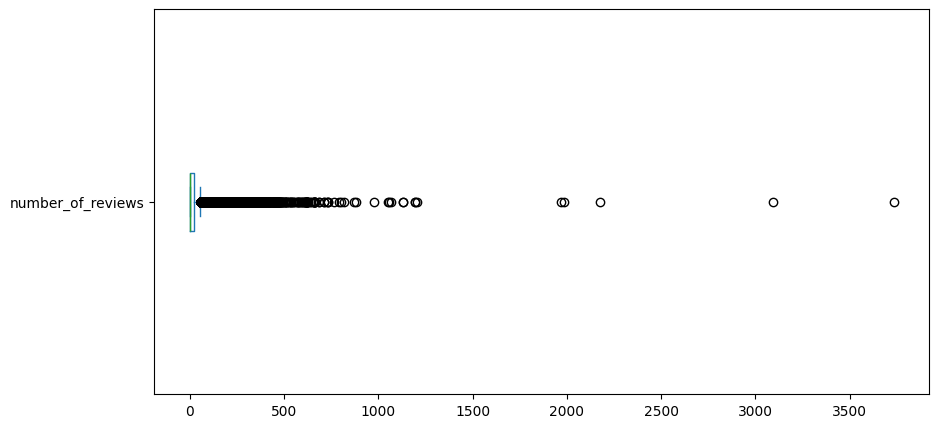

In [14]:
df.number_of_reviews.plot(kind='box',vert=False,figsize=(10,5))
print('number_of_reviews : valores acima de 100')
print('{} entradas'.format(len(df[df.number_of_reviews > 100])))
print('{:.2f}%'.format((len(df[df.number_of_reviews > 100]) / df.shape[0])*100))

Claramente todos os gráficos possuem outliers, esses valores extremos podem distorcer a resultados de análises e podem levar a resultados errados e decisões equivocadas. Sendo assim, precisamos removê-los.

### Removendo outliers

Aqui vamos usar a função drop para remover o que não queremos com base em um recorte, trabalharemos com as mesmas três colunas mencionadas acima.



<Axes: >

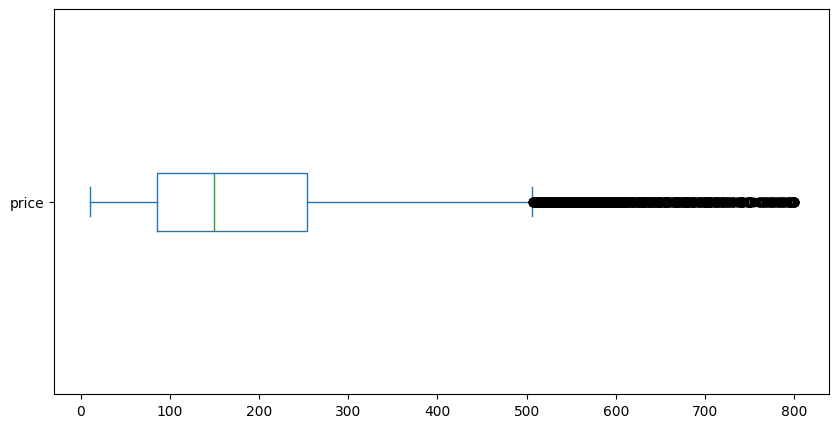

In [15]:
df_limpo = df.copy()
df_limpo.drop(df_limpo[df_limpo.price > 800].index,axis=0,inplace=True)
df_limpo.price.plot(kind='box',vert=False,figsize=(10,5))

<Axes: >

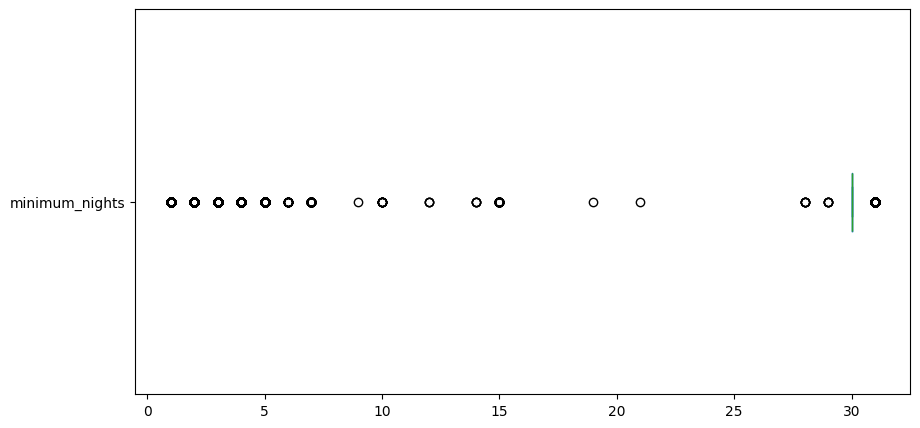

In [16]:
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 31].index,axis=0,inplace=True)
df_limpo.minimum_nights.plot(kind='box',vert=False,figsize=(10,5))

Parece que a cidade de Nova York possui poucos imóveis com o mínimo de noites menor que 30 dias. Esse efeito é um pouco curioso ja que o Airbnb, tem como objetivo conectar pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática.

<Axes: >

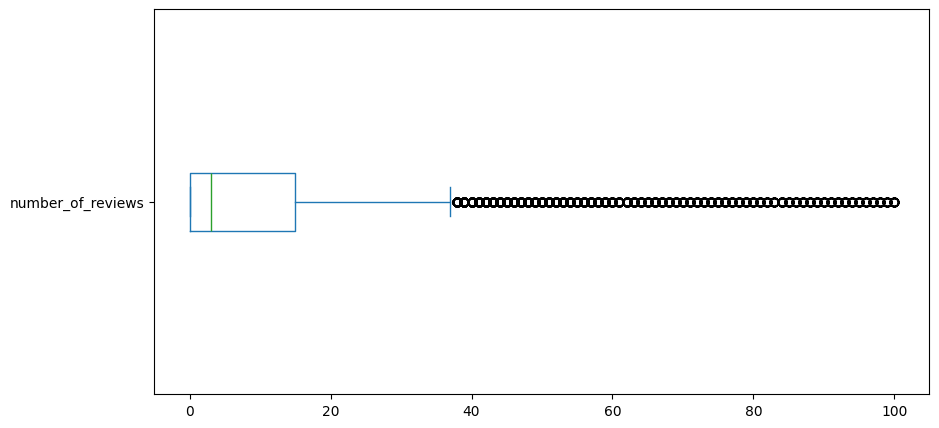

In [17]:
df_limpo.drop(df_limpo[df_limpo.number_of_reviews > 100].index,axis=0,inplace=True)
df_limpo.number_of_reviews.plot(kind='box',vert=False,figsize=(10,5))

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>, <Axes: >]],
      dtype=object)

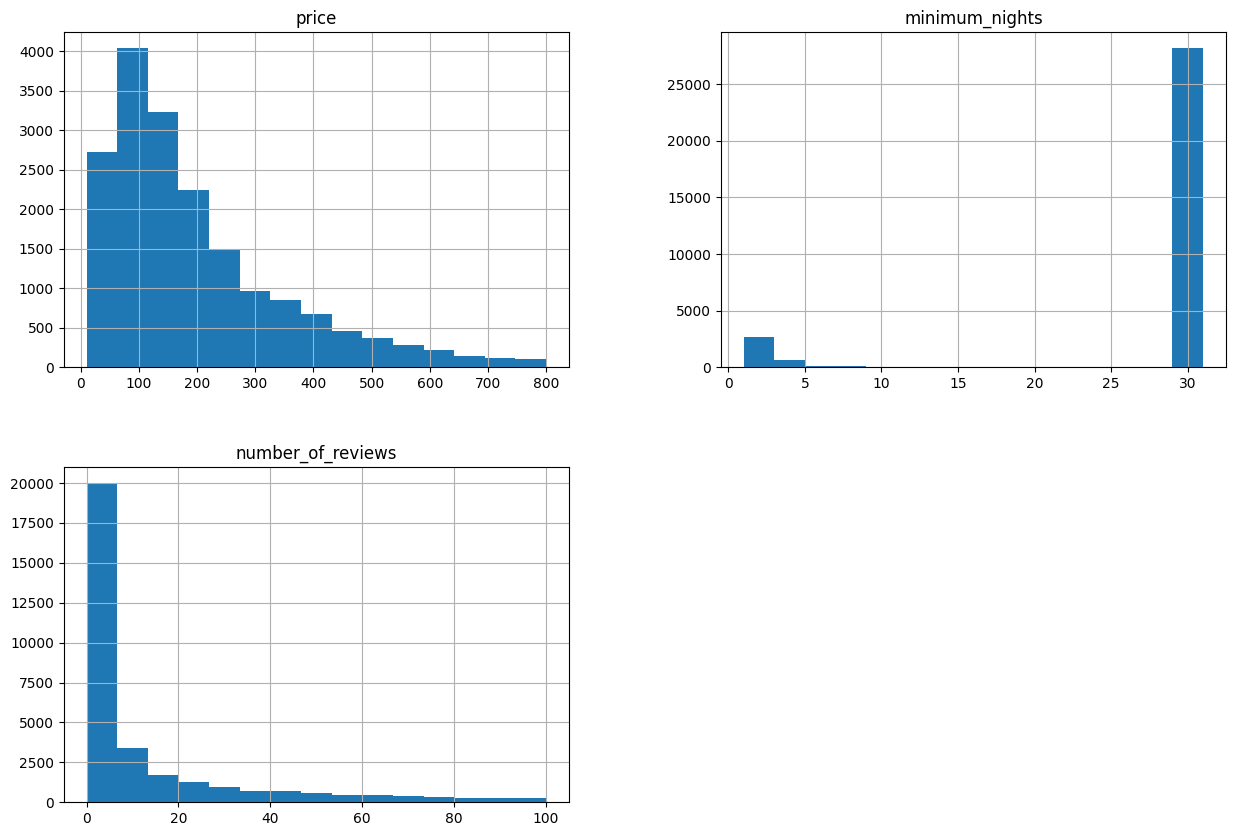

In [18]:
df_limpo[['price','minimum_nights','number_of_reviews']].hist(bins=15, figsize=(15,10))

Após a limpeza dos dados podemos dá inicio a segunda parte do nosso trabalho que é a análise exploratória dos nossos dados.

### Qual a média dos preços de aluguel?

In [19]:
# ver a média da coluna `price``
media_preço = df_limpo.price.mean()
print('A média de aluguel em New York é de: {:.2f} dolares'.format(media_preço))

A média de aluguel em New York é de: 197.27 dolares


### Qual a correlação existente entre as variáveis

De forma simples, correlação mostra como duas variaveis andam juntas. Se é para o mesmo lado (positiva), para lados opostos (negativa), sem relação aparente (nula).

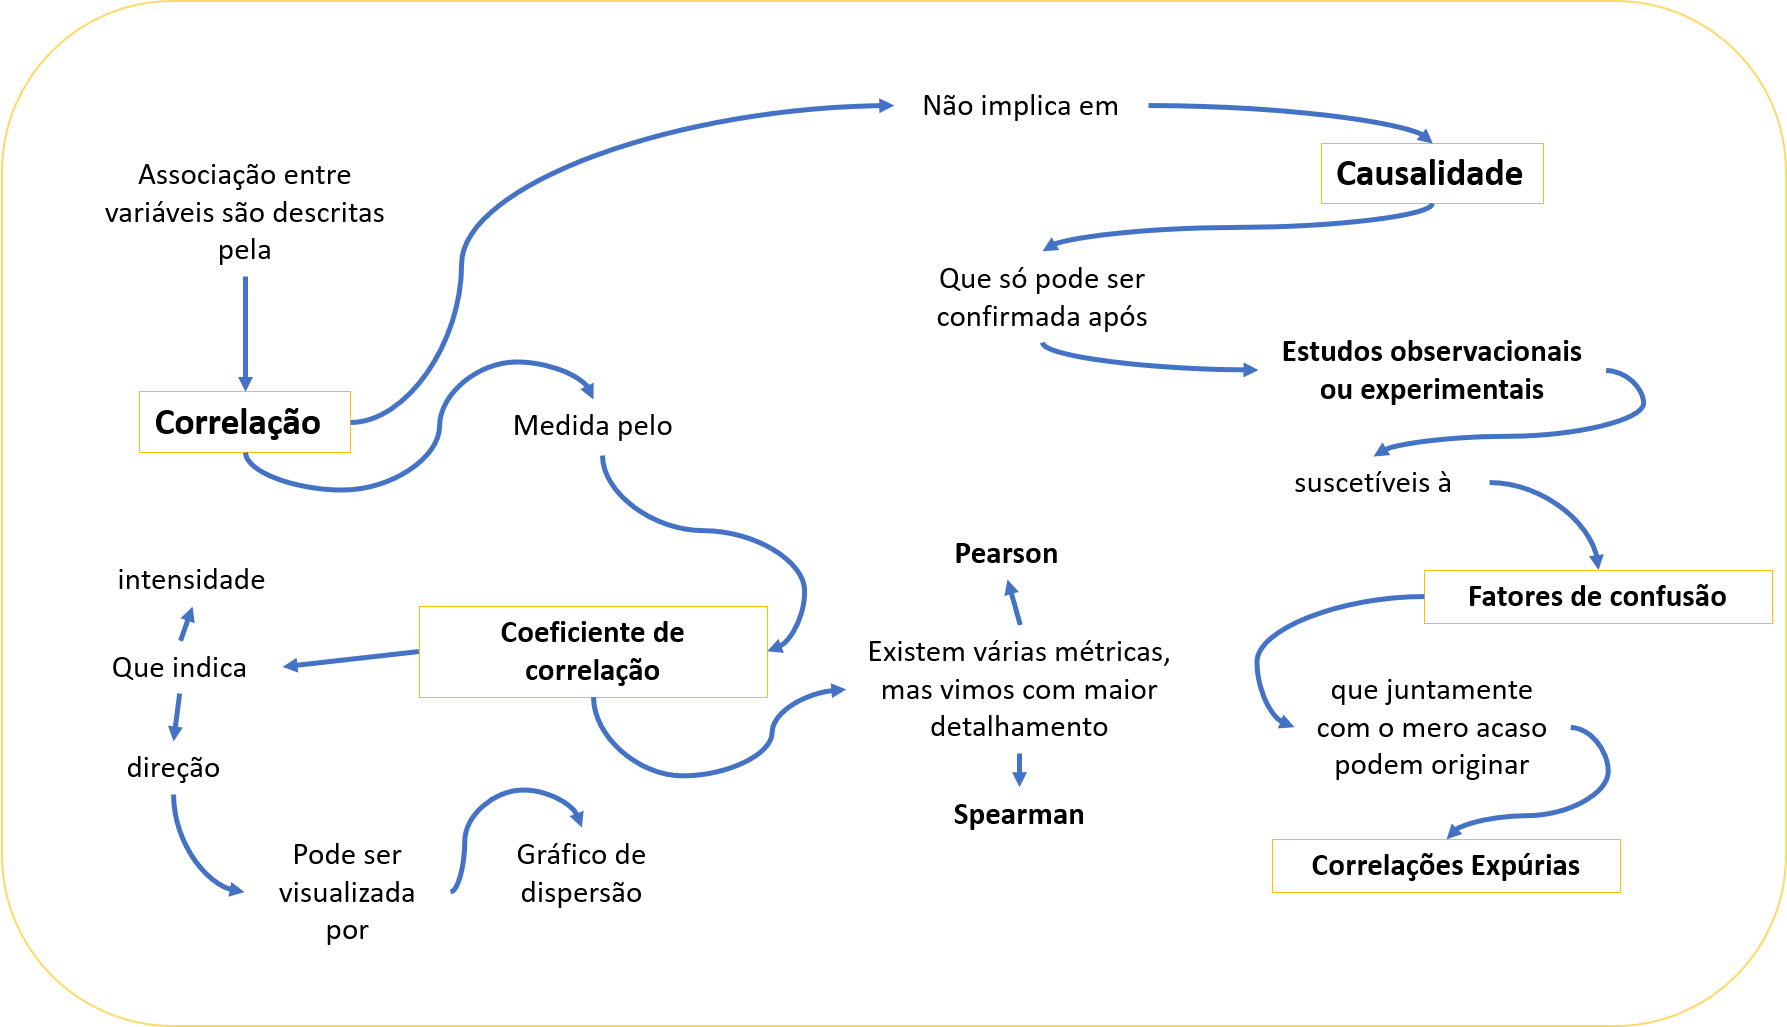

In [20]:
# criar uma matriz de correlação
corr = df_limpo[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.195910,-0.039037,0.122230,0.343886,0.014315,0.067973
minimum_nights,-0.195910,1.000000,-0.334038,-0.597019,0.106427,-0.055856,-0.631335
number_of_reviews,-0.039037,-0.334038,1.000000,0.532521,-0.169768,0.066764,0.502101
reviews_per_month,0.122230,-0.597019,0.532521,1.000000,-0.076447,0.182144,0.792961
calculated_host_listings_count,0.343886,0.106427,-0.169768,-0.076447,1.000000,0.168339,-0.077806
availability_365,0.014315,-0.055856,0.066764,0.182144,0.168339,1.000000,0.106499
number_of_reviews_ltm,0.067973,-0.631335,0.502101,0.792961,-0.077806,0.106499,1.000000


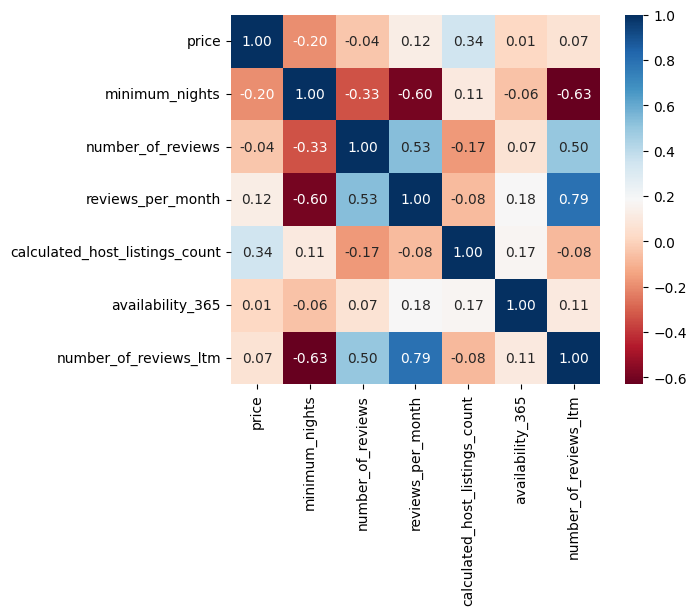

In [21]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu',fmt='.2f',square=True,linecolor='white',annot=True);

Aqui notamos que as correlações mais fortes são as mais lógicas ligadas a variável de avaliações. Sendo assim não temos nenhuma correlação relevante.

###  Qual o tipo de imóvel mais alugado no Airbnb?

In [22]:
# distribuição de alugueis por tipo de imóvel
df_limpo.room_type.value_counts()

,count
room_type,
Entire home/apt,16914
Private room,14507
Shared room,211
Hotel room,145


In [23]:
# porcentagem de alugueis por cada tipo de imóvel
df_limpo.room_type.value_counts() / df_limpo.shape[0]

,count
room_type,
Entire home/apt,0.532272
Private room,0.456525
Shared room,0.006640
Hotel room,0.004563


Referente aos tipos de imóveis mais alugados:

*   52,8% dos imóveis são casa/apartamento
*   46,0 são quartos privados
*   Quarto de hotel (inteiro ou compartilhado) representam somente 1,2% dos imóveis alugados.

### Qual a região com mais anuncios

In [24]:
df_limpo.neighbourhood.value_counts() / df_limpo.shape[0]

,count
neighbourhood,
Bedford-Stuyvesant,0.071530
Williamsburg,0.058376
Midtown,0.052680
Harlem,0.045693
Hell's Kitchen,0.041571
...,...
New Dorp Beach,0.000031
"Chelsea, Staten Island",0.000031
"Bay Terrace, Staten Island",0.000031


In [25]:
df_limpo.neighbourhood_group.value_counts() / df_limpo.shape[0]

,count
neighbourhood_group,
Manhattan,0.444504
Brooklyn,0.366397
Queens,0.147497
Bronx,0.032036
Staten Island,0.009567


A maior parte dos anúncios está concentrada em Manhattan e Brooklyn.

### Qual a localidade mais cara do dataset?



Com a limpeza do dataset mantivemos a faixa de preços até 800 sendo assim faremos buscaremos a localidade mais cara no dataset antigo (df)

In [26]:
# ver preços por bairros, na média
df_limpo.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Fort Wadsworth,600.000000
Tribeca,446.250000
NoHo,423.333333
Theater District,420.077844
Battery Park City,396.888889
SoHo,389.781609
Financial District,381.056856
West Village,367.592965
Midtown,363.105469


In [27]:
print(df_limpo[df_limpo.neighbourhood == 'Fort Wadsworth'].shape)
print(df_limpo[df_limpo.neighbourhood == 'NoHo'].shape)
print(df_limpo[df_limpo.neighbourhood == 'Tribeca'].shape)

(1, 17)
(28, 17)
(129, 17)


Para as localidades mais caras do nosso Dataset temos:

Fort Wadsworth em primeiro lugar com uma unica amostra.
Logo em seguida temos Tribeca e NoHo mais imóveis.

In [28]:
df_limpo.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood_group,
Manhattan,263.702251
Brooklyn,158.973899
Queens,129.257859
Staten Island,114.866412
Bronx,112.346309


In [29]:
df_limpo.groupby(['neighbourhood_group']).price.sum().sort_values(ascending=False)[:10]

,price
neighbourhood_group,
Manhattan,2050285.0
Brooklyn,992792.0
Queens,365929.0
Bronx,83698.0
Staten Island,30095.0


Seguindo na análise da localidade mais cara do nosso Dataset:

Temos Manhattan como a mais cara dos grupos de bairro

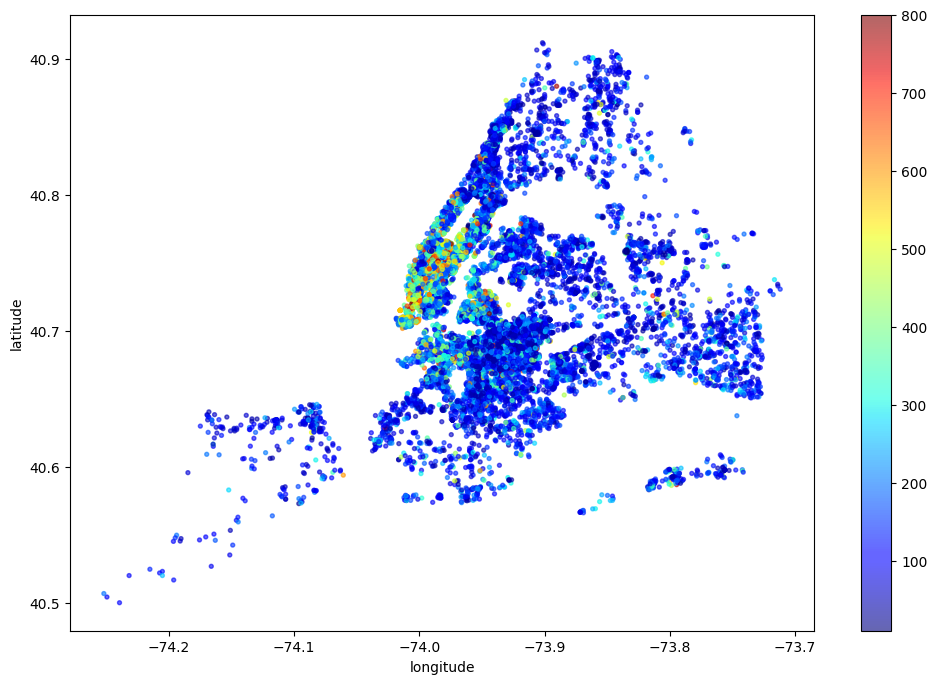

In [30]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind='scatter',x='longitude',y='latitude',
              alpha=0.6,c=df_limpo['price'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8));

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [31]:
media_noites = df_limpo.minimum_nights.mean()
print('Para alugar um imóvel em Nova york é necessario permanecer no mínimo {:.2f} no imóvel'.format(media_noites))

Para alugar um imóvel em Nova york é necessario permanecer no mínimo 26.89 no imóvel


Conforme observado, a maioria dos imóveis exigia um mínimo de noites muito elevado para o que imaginamos, e essa tendência se confirma aqui. Uma busca rápida no Google revelou um artigo (https://x.gd/r9fjc) que corrobora nossos achados a partir dos dados brutos:

"Uma nova lei na cidade de Nova York proibiu, a partir desta semana, o aluguel de apartamentos para estadias de menos de um mês, uma medida que impacta diretamente o negócio de plataformas como o Airbnb.

Estima-se que há cerca de 36 mil apartamentos da cidade que eram disponibilizados para aluguéis de curta temporada."

## Conclusões

Este estudo exploratório teve como objetivo principal compreender o comportamento dos anúncios do Airbnb na cidade de Nova York, utilizando dados públicos disponíveis. Durante a análise, foram identificados e tratados *outliers* significativos nas variáveis `price`, `minimum_nights` e `number_of_reviews`, o que permitiu uma visualização mais clara da distribuição dos dados.

Observamos que:

*   **Não foram encontradas correlações fortes** entre as variáveis numéricas, especialmente em relação ao preço, exceto por relações lógicas envolvendo o número de avaliações e a frequência de comentários.
*   A **maior parte dos anúncios está concentrada em Manhattan e Brooklyn**, que também são as regiões com a maior média de preços.
*   Os tipos de acomodação mais comuns são **“Entire home/apt” e “Private room”**, representando a vasta maioria das ofertas.
*   Um achado notável foi a **média relativamente alta de `minimum_nights`**, que foi esclarecida por uma nova legislação municipal de Nova York, proibindo aluguéis de curta duração (menos de um mês) para apartamentos, um fator crucial para entender o mercado local do Airbnb.

Os resultados obtidos fornecem uma base sólida de insights sobre o mercado de aluguéis por temporada em Nova York e podem servir como ponto de partida para análises mais avançadas, como a construção de modelos preditivos de preço ou a segmentação detalhada de mercado.